<a href="https://colab.research.google.com/github/rechavar/pyCovid_TechLabsProj/blob/Phillip/TechLabs__finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TechLabs final project 
## (Problem 2 - Group 8)

---

This notebook represents the work in the final project of the Techlabs #codeathome course.
<br> <br>
Team members: Luca Wulfert, Laura Laks, Phillip Guske, Juliana Bedoya, Alejandro Echavarria and Marco Stoever

---

### libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Constants

In [0]:
confirmed_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

### Data Exploration

---
GitHub repository: https://github.com/CSSEGISandData/COVID-19 
<br>
(c) Johns Hopkins University Center for Systems Science and Engineering <br> <br>
The datasets were also used by Kaggle for their weekly *COVID19 Global Forecasting* competition. <br>
(e.g. see: https://www.kaggle.com/c/covid19-global-forecasting-week-5)


---







In [0]:
df_confirmed = pd.read_csv(confirmed_csv_url)
df_death = pd.read_csv(death_csv_url)
df_recovered = pd.read_csv(recovered_csv_url)

In [4]:
df_confirmed.head()

Province/State Country/Region      Lat  ...  5/21/20  5/22/20  5/23/20
0            NaN    Afghanistan  33.0000  ...     8676     9216     9998
1            NaN        Albania  41.1533  ...      969      981      989
2            NaN        Algeria  28.0339  ...     7728     7918     8113
3            NaN        Andorra  42.5063  ...      762      762      762
4            NaN         Angola -11.2027  ...       58       60       61

[5 rows x 127 columns]

In [5]:
df_death.head()

Province/State Country/Region      Lat  ...  5/21/20  5/22/20  5/23/20
0            NaN    Afghanistan  33.0000  ...      193      205      216
1            NaN        Albania  41.1533  ...       31       31       31
2            NaN        Algeria  28.0339  ...      575      582      592
3            NaN        Andorra  42.5063  ...       51       51       51
4            NaN         Angola -11.2027  ...        3        3        4

[5 rows x 127 columns]

In [6]:
df_recovered.head()

Province/State Country/Region      Lat  ...  5/21/20  5/22/20  5/23/20
0            NaN    Afghanistan  33.0000  ...      938      996     1040
1            NaN        Albania  41.1533  ...      771      777      783
2            NaN        Algeria  28.0339  ...     4062     4256     4426
3            NaN        Andorra  42.5063  ...      639      652      653
4            NaN         Angola -11.2027  ...       17       17       18

[5 rows x 127 columns]

In [7]:
pd.set_option('display.max_rows', 300)

print(df_confirmed.iloc[:,1:2])
print(df_death.iloc[:,1:2])
print(df_recovered.iloc[:,1:2])

#Taiwan is written with an asterisk (*) at the end, we have to change this:
#We also want to have "USA" instead of "US":
#Congo (Brazzaville) and Congo (Kinshasa) are capitals of different countries!
#Brazzaville -> Republic of the Congo || Kinshasa -> Democratic Republic of the Congo

#We will change this in the data cleaning part

                       Country/Region
0                         Afghanistan
1                             Albania
2                             Algeria
3                             Andorra
4                              Angola
5                 Antigua and Barbuda
6                           Argentina
7                             Armenia
8                           Australia
9                           Australia
10                          Australia
11                          Australia
12                          Australia
13                          Australia
14                          Australia
15                          Australia
16                            Austria
17                         Azerbaijan
18                            Bahamas
19                            Bahrain
20                         Bangladesh
21                           Barbados
22                            Belarus
23                            Belgium
24                              Benin
25          

In [0]:
#reset max_rows displayed to default number (10):
pd.set_option('display.max_rows', 10)

### Data Cleaning

In [0]:
#get the LON AND LAT data from df_confirmed
df_wgs84 = df_confirmed[['Lat','Long']]

all_dataframes = [df_confirmed, df_death, df_recovered]

for df in all_dataframes:
  # Dropping of unnecessary columns
  df.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

  #Country renaming:
  df["Country/Region"].replace(["Taiwan*", "US", "Congo (Brazzaville)", "Congo (Kinshasa)"], 
                               ["Taiwan", "USA", "Republic of the Congo", "Democratic Republic of the Congo"],
                               inplace = True)
  #Set new index
  df.set_index('Country/Region', inplace = True)




#I would really like to apply the loop to all the data cleaning steps to make the code a bit shorter
#However, I didn't manage to do this with the last 2 steps below, mainly bc here, we have the "=" sign in the middle
#Maybe you know something?

#Grouping together countries originally split into multiple Provinces/States
#(Australia, Canada, China, Denmark, France, Netherlands, United Kingdom)
df_confirmed = df_confirmed.groupby(by = df_confirmed.index, axis = 0).sum()
df_death = df_death.groupby(by= df_death.index, axis = 0 ).sum()
df_recovered = df_recovered.groupby(by= df_recovered.index, axis = 0).sum()

# Addition of a "global" row
df_confirmed.loc['Global'] = df_confirmed.sum(axis=0)
df_death.loc['Global'] = df_death.sum(axis=0)
df_recovered.loc['Global'] = df_recovered.sum(axis=0)

In [0]:
#changing rows and columns:
df_confirmed.reset_index(inplace=True)
df_death.reset_index(inplace=True)
df_recovered.reset_index(inplace=True)

#Setting the Country/Region variable as column header:
df_confirmed = df_confirmed.transpose()
df_confirmed.rename(columns=df_confirmed.iloc[0], inplace = True)
df_confirmed.drop("Country/Region", inplace=True)

df_death = df_death.transpose()
df_death.rename(columns=df_death.iloc[0], inplace = True)
df_death.drop("Country/Region", inplace=True)

df_recovered = df_recovered.transpose()
df_recovered.rename(columns=df_recovered.iloc[0], inplace = True)
df_recovered.drop("Country/Region", inplace=True)

#Naming the Date index:
df_confirmed.index.rename("Date", inplace= True)
df_death.index.rename("Date", inplace= True)
df_recovered.index.rename("Date", inplace= True)

#Creating a datetime index:
df_confirmed.index = pd.to_datetime(df_confirmed.index)
df_death.index = pd.to_datetime(df_death.index)
df_recovered.index = pd.to_datetime(df_recovered.index)

In [11]:
df_confirmed
#now 186 countries in total + cruise ships "Diamond Princess" & "MS Zaandam" + "Global" count

Afghanistan Albania Algeria Andorra  ... Yemen Zambia Zimbabwe   Global
Date                                            ...                               
2020-01-22           0       0       0       0  ...     0      0        0      555
2020-01-23           0       0       0       0  ...     0      0        0      654
2020-01-24           0       0       0       0  ...     0      0        0      941
2020-01-25           0       0       0       0  ...     0      0        0     1434
2020-01-26           0       0       0       0  ...     0      0        0     2118
...                ...     ...     ...     ...  ...   ...    ...      ...      ...
2020-05-19        7653     949    7377     761  ...   167    772       46  4897492
2020-05-20        8145     964    7542     762  ...   184    832       48  4996472
2020-05-21        8676     969    7728     762  ...   197    866       51  5102424
2020-05-22        9216     981    7918     762  ...   209    920       51  5210817
2020-05-23        9998     989    8113     762  ...   212    920       56  5310362

[123 rows x 189 columns]

### New Dataframe: Active Cases

In [0]:
df_active = df_confirmed.subtract(df_recovered, df_death)

# Data Visualization

## Static Data Visualization (Matplotlib)

The country is: Afghanistan


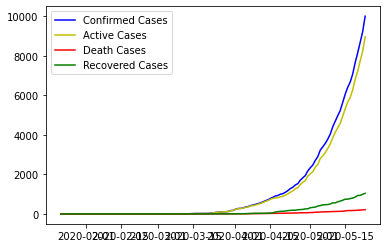

The country is: Albania


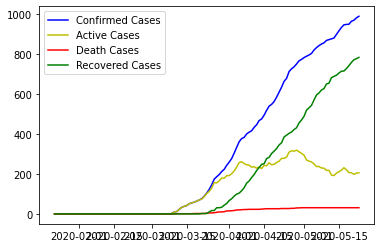

The country is: Algeria


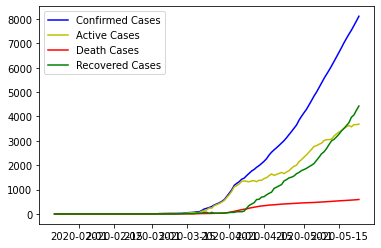

The country is: Andorra


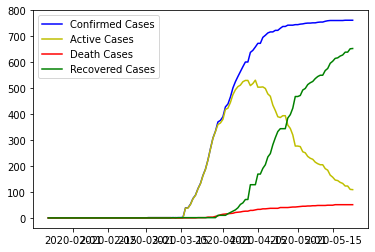

The country is: Angola


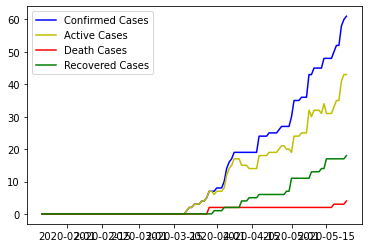

The country is: Antigua and Barbuda


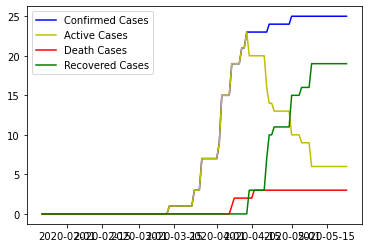

The country is: Argentina


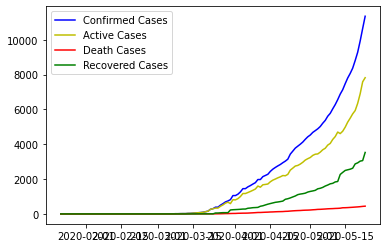

The country is: Armenia


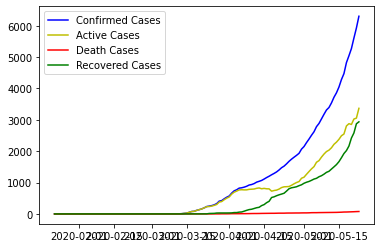

The country is: Australia


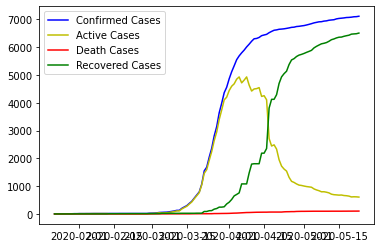

The country is: Austria


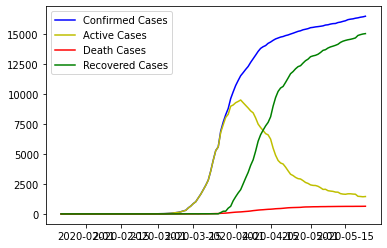

The country is: Azerbaijan


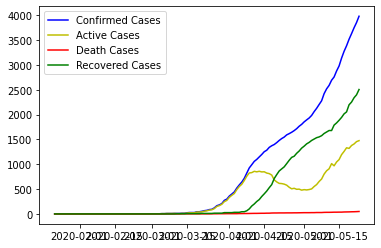

The country is: Bahamas


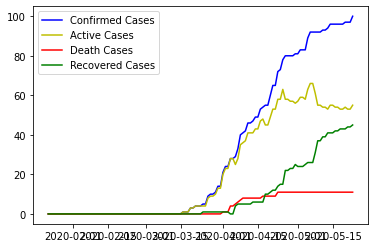

The country is: Bahrain


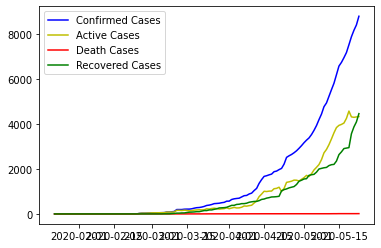

The country is: Bangladesh


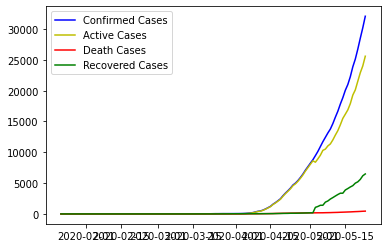

The country is: Barbados


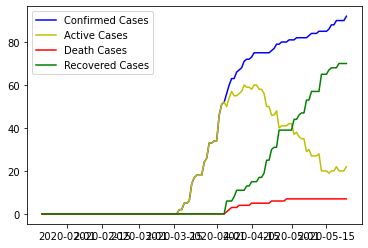

The country is: Belarus


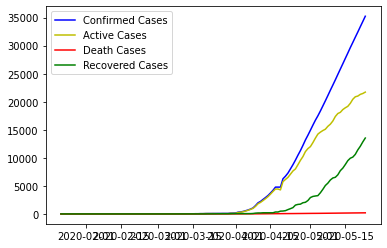

The country is: Belgium


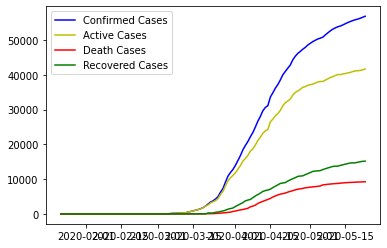

The country is: Belize


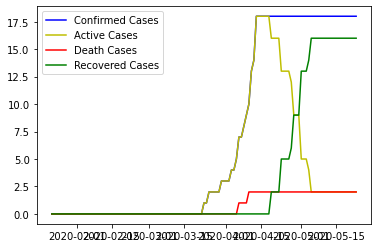

The country is: Benin


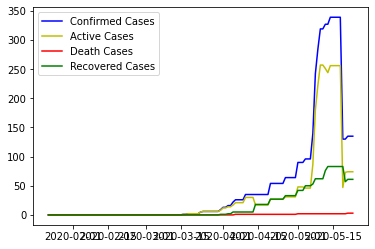

The country is: Bhutan


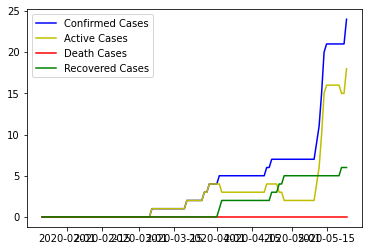

The country is: Bolivia


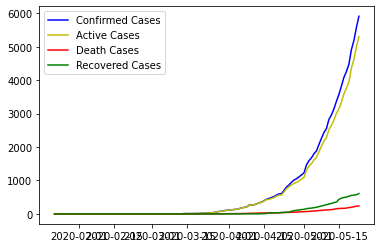

The country is: Bosnia and Herzegovina


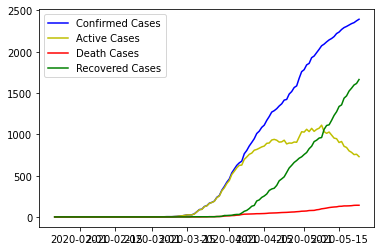

The country is: Botswana


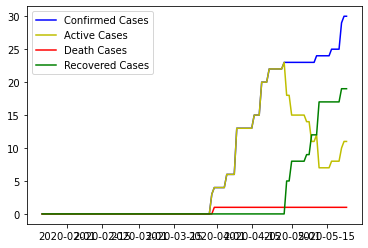

The country is: Brazil


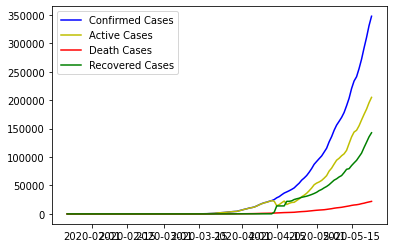

The country is: Brunei


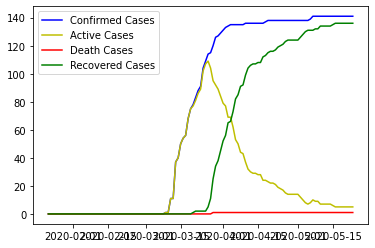

The country is: Bulgaria


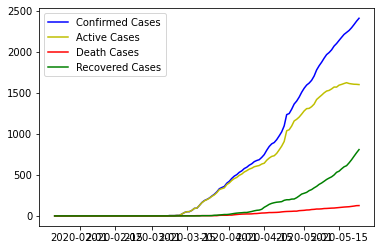

The country is: Burkina Faso


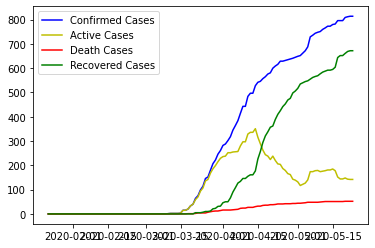

The country is: Burma


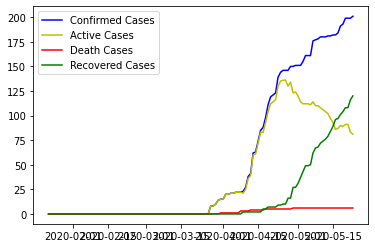

The country is: Burundi


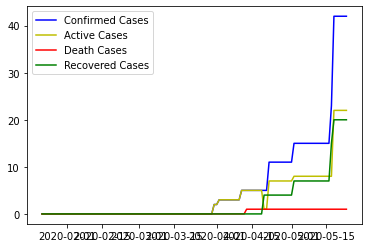

The country is: Cabo Verde


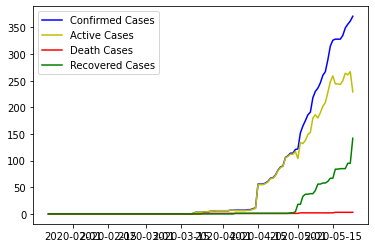

The country is: Cambodia


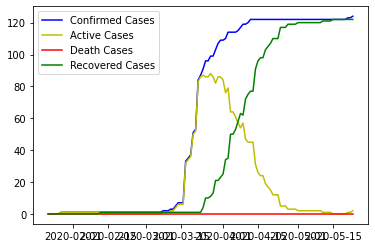

The country is: Cameroon


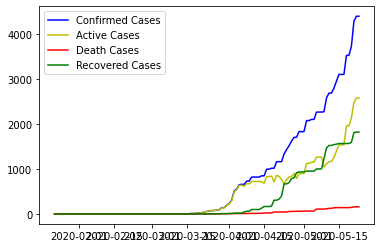

The country is: Canada


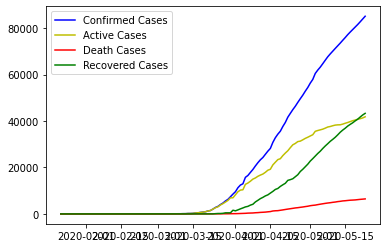

The country is: Central African Republic


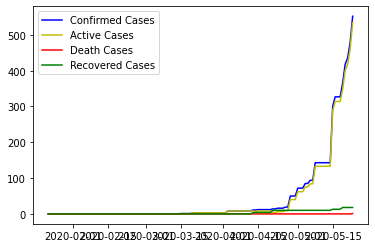

The country is: Chad


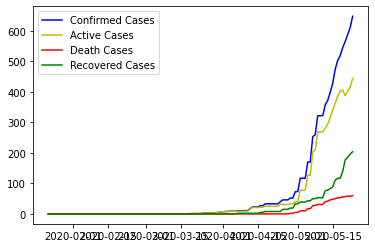

The country is: Chile


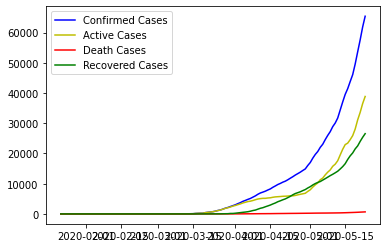

The country is: China


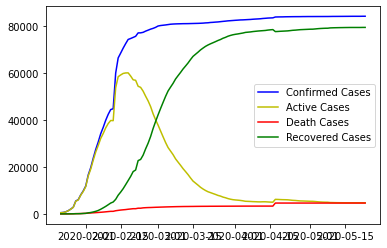

The country is: Colombia


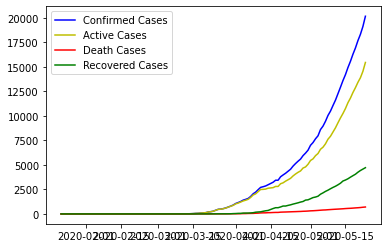

The country is: Comoros


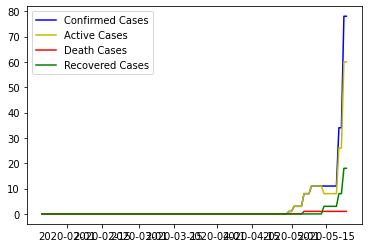

The country is: Costa Rica


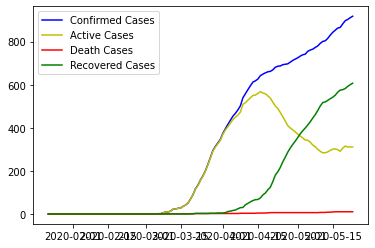

The country is: Cote d'Ivoire


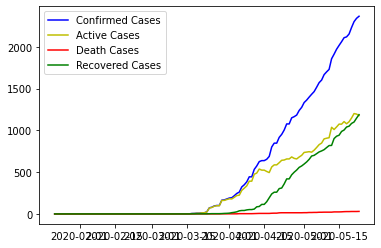

The country is: Croatia


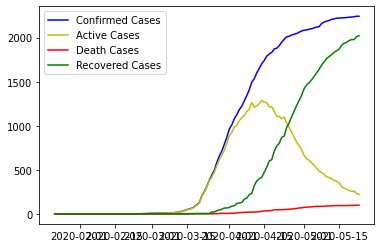

The country is: Cuba


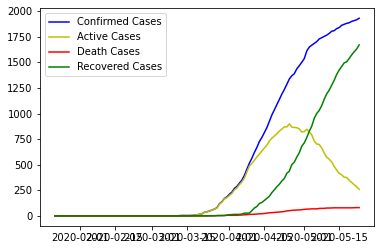

The country is: Cyprus


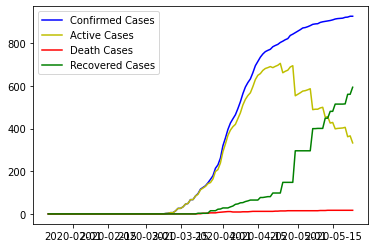

The country is: Czechia


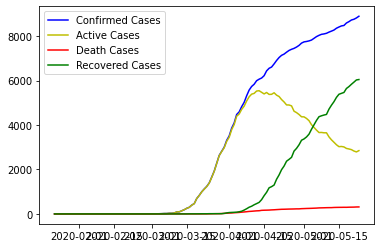

The country is: Democratic Republic of the Congo


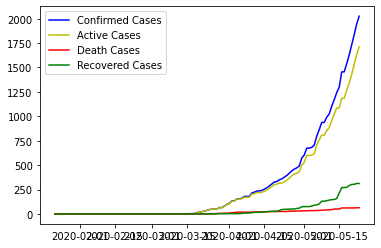

The country is: Denmark


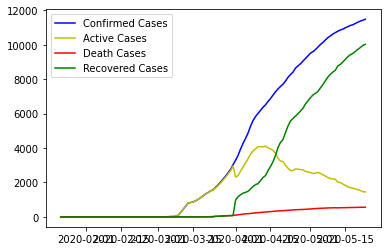

The country is: Diamond Princess


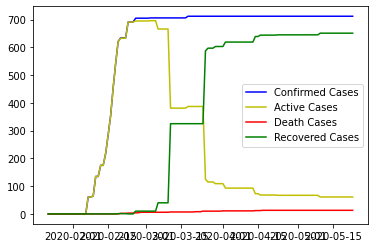

The country is: Djibouti


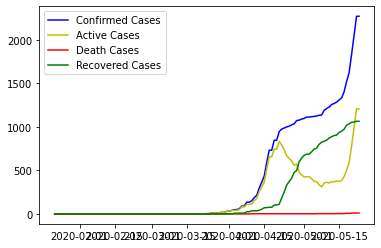

The country is: Dominica


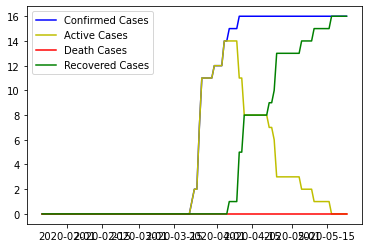

The country is: Dominican Republic


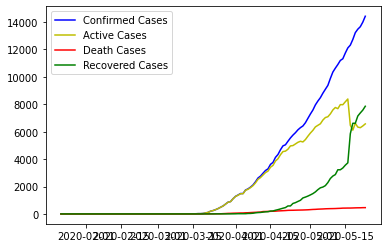

The country is: Ecuador


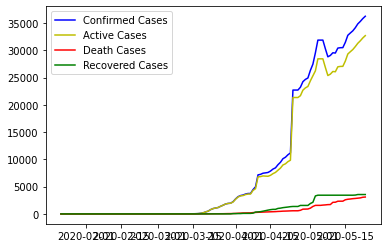

The country is: Egypt


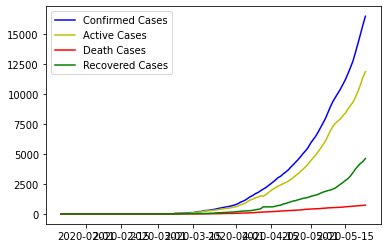

The country is: El Salvador


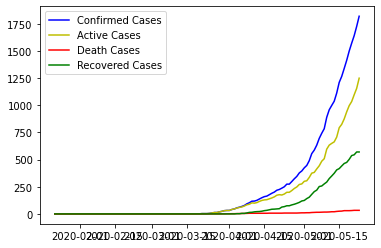

The country is: Equatorial Guinea


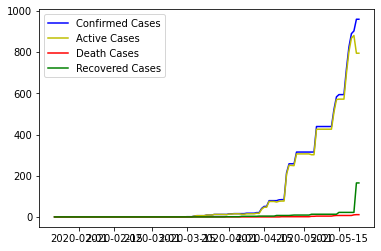

The country is: Eritrea


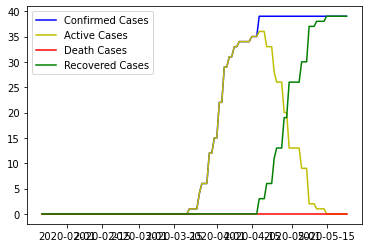

The country is: Estonia


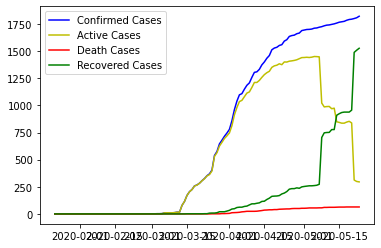

The country is: Eswatini


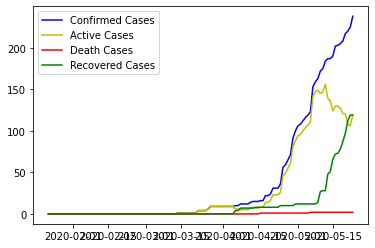

The country is: Ethiopia


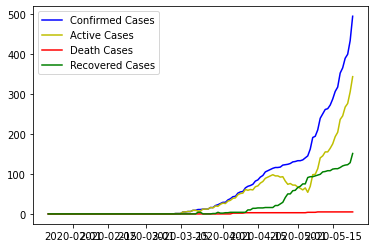

The country is: Fiji


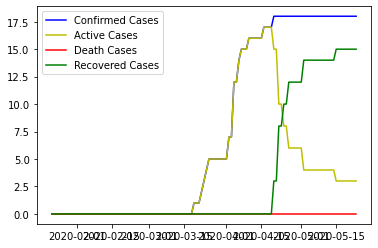

The country is: Finland


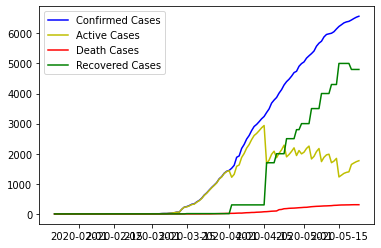

The country is: France


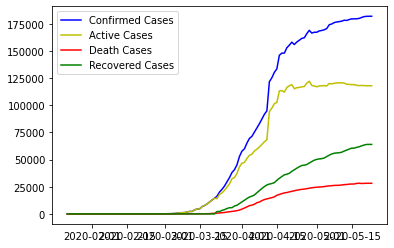

The country is: Gabon


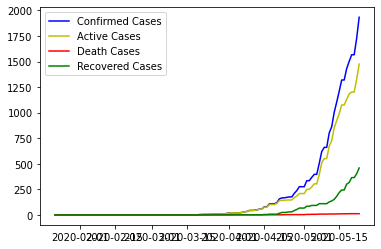

The country is: Gambia


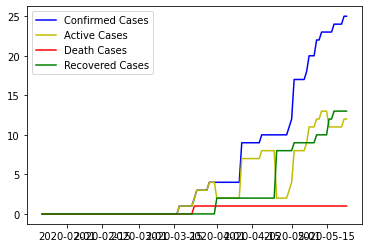

The country is: Georgia


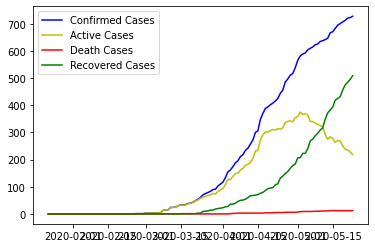

The country is: Germany


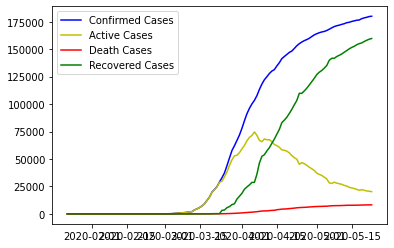

The country is: Ghana


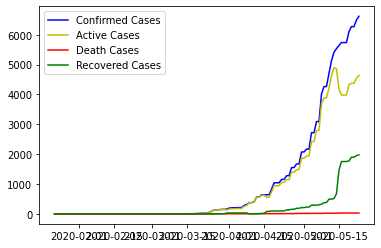

The country is: Greece


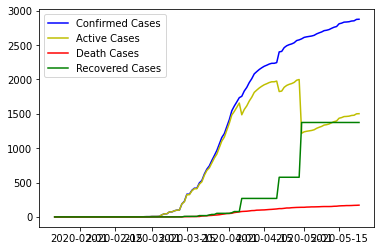

The country is: Grenada


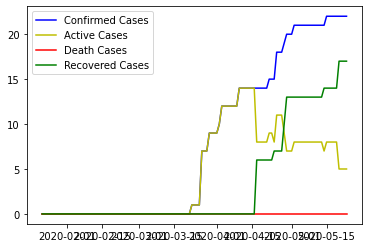

The country is: Guatemala


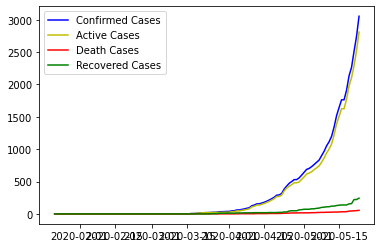

The country is: Guinea


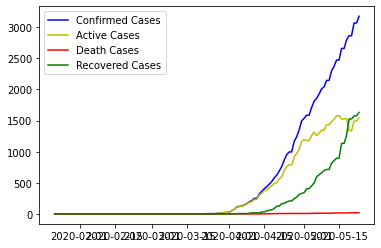

The country is: Guinea-Bissau


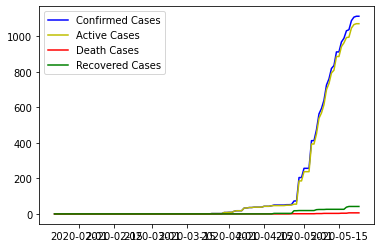

The country is: Guyana


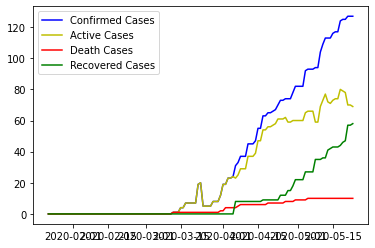

The country is: Haiti


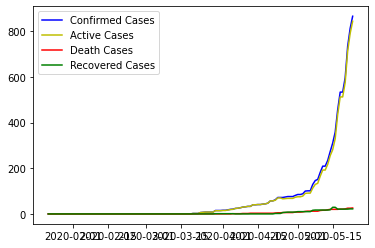

The country is: Holy See


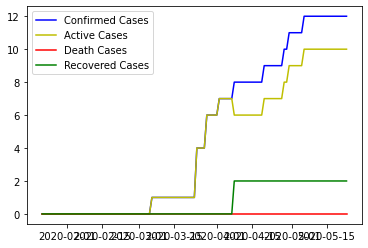

The country is: Honduras


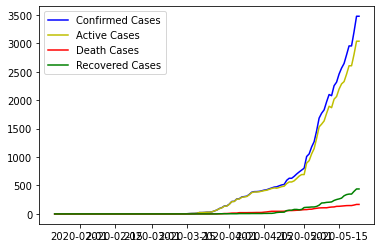

The country is: Hungary


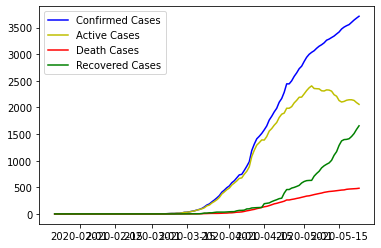

The country is: Iceland


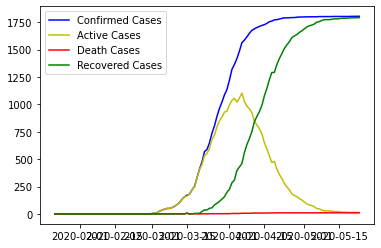

The country is: India


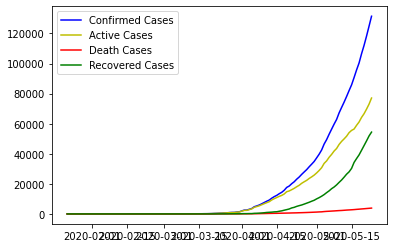

The country is: Indonesia


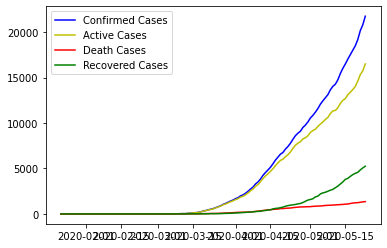

The country is: Iran


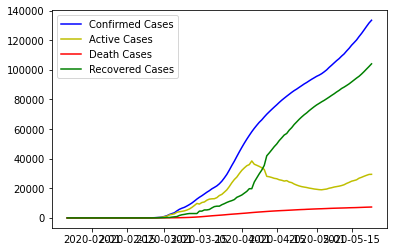

The country is: Iraq


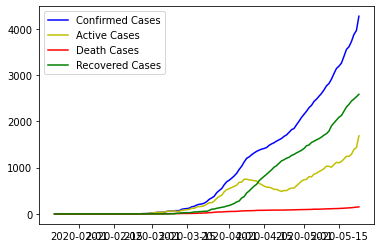

The country is: Ireland


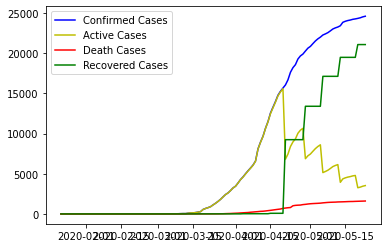

The country is: Israel


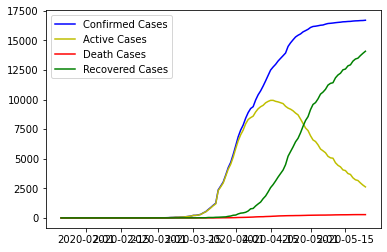

The country is: Italy


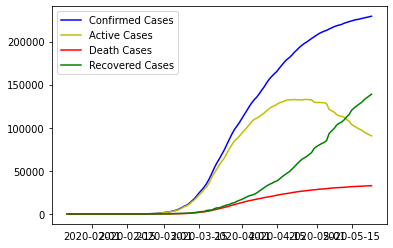

The country is: Jamaica


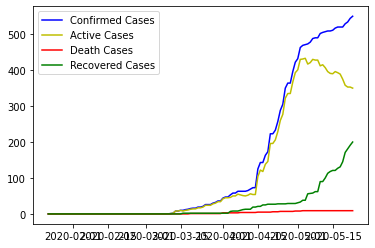

The country is: Japan


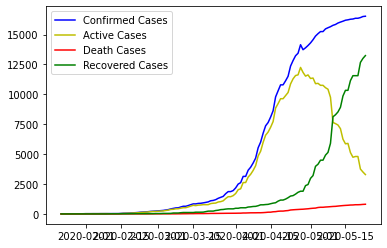

The country is: Jordan


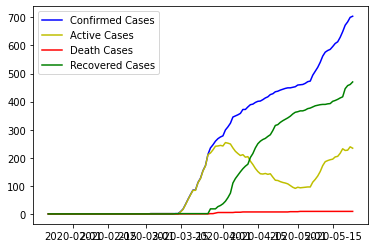

The country is: Kazakhstan


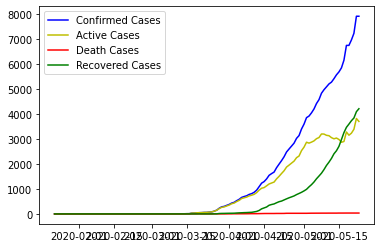

The country is: Kenya


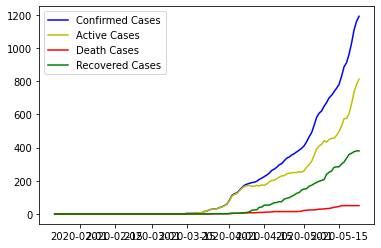

The country is: Korea, South


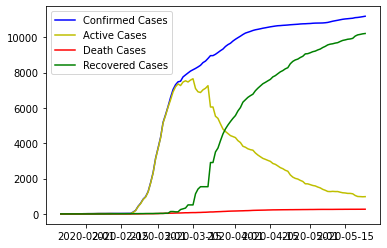

The country is: Kosovo


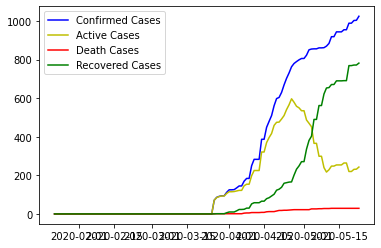

The country is: Kuwait


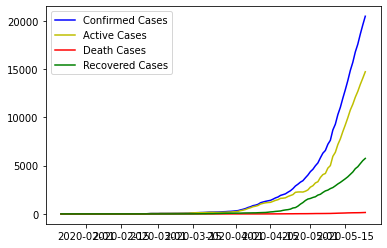

The country is: Kyrgyzstan


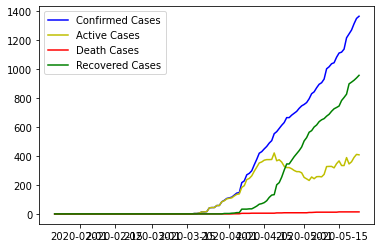

The country is: Laos


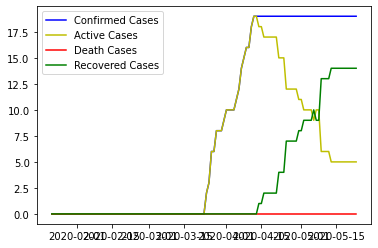

The country is: Latvia


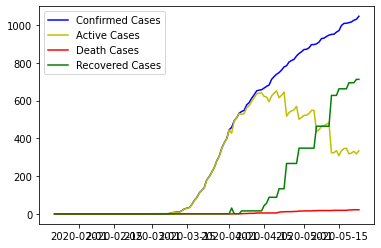

The country is: Lebanon


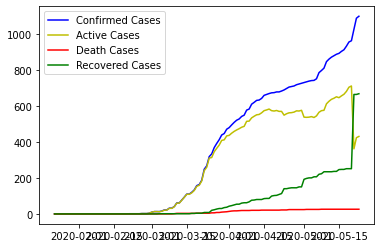

The country is: Lesotho


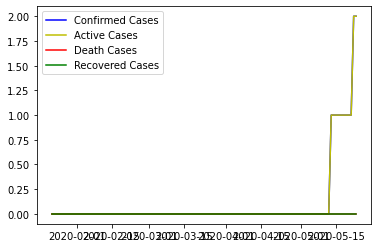

The country is: Liberia


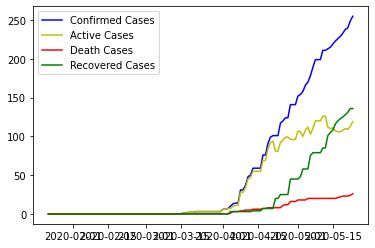

The country is: Libya


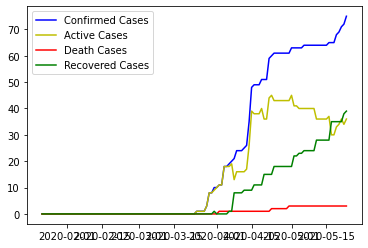

The country is: Liechtenstein


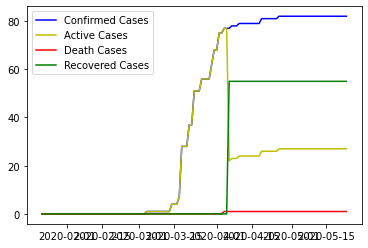

The country is: Lithuania


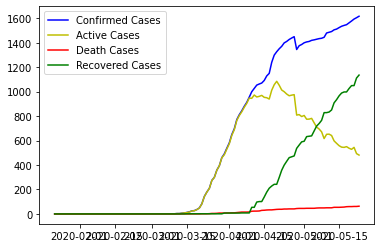

The country is: Luxembourg


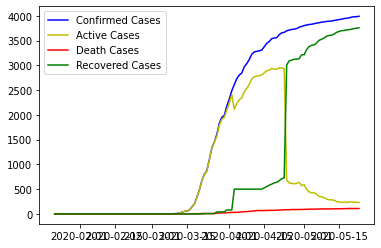

The country is: MS Zaandam


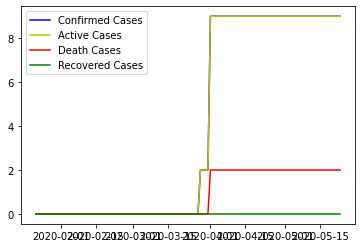

The country is: Madagascar


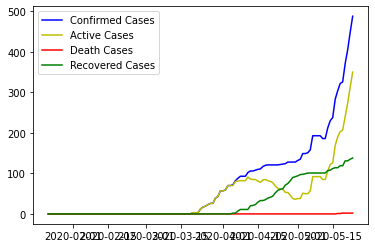

The country is: Malawi


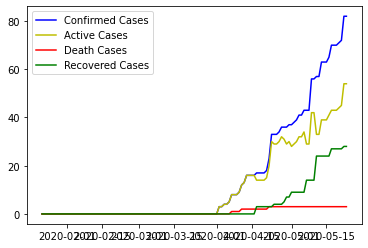

The country is: Malaysia


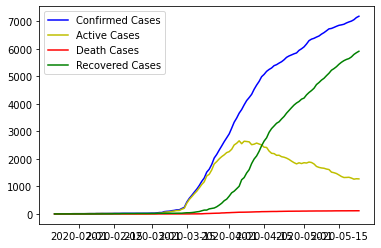

The country is: Maldives


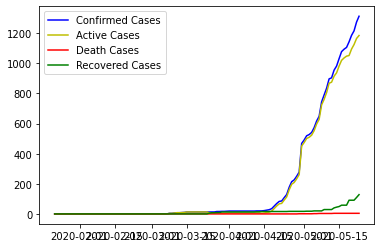

The country is: Mali


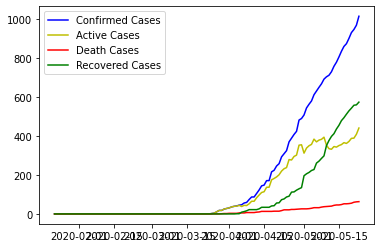

The country is: Malta


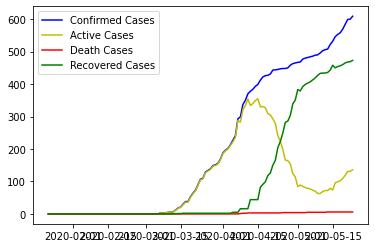

The country is: Mauritania


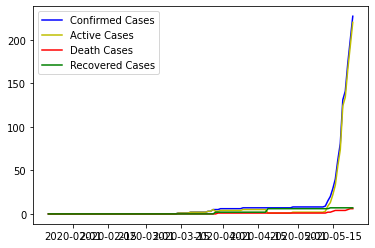

The country is: Mauritius


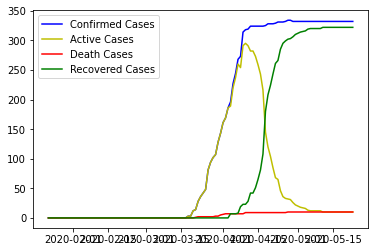

The country is: Mexico


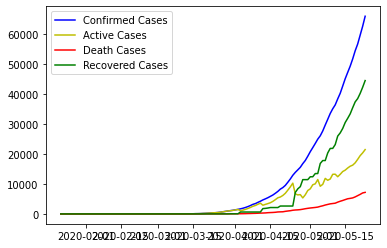

The country is: Moldova


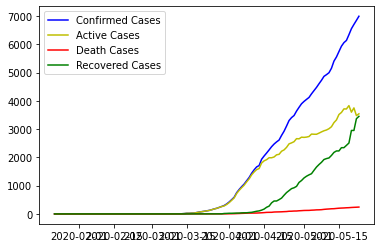

The country is: Monaco


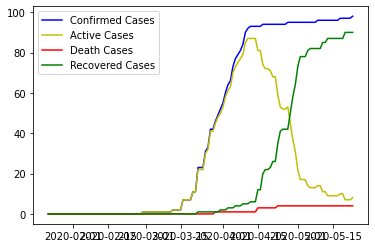

The country is: Mongolia


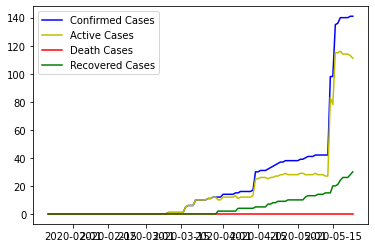

The country is: Montenegro


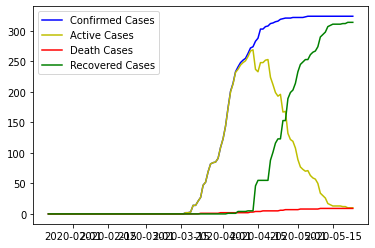

The country is: Morocco


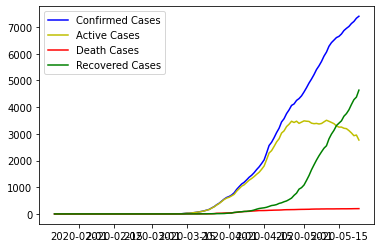

The country is: Mozambique


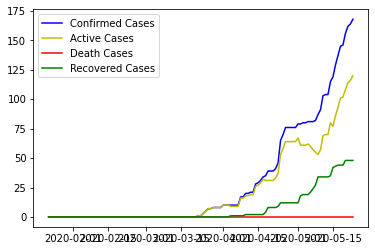

The country is: Namibia


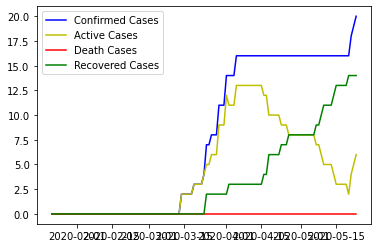

The country is: Nepal


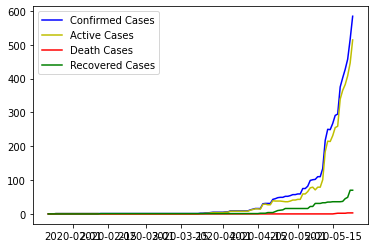

The country is: Netherlands


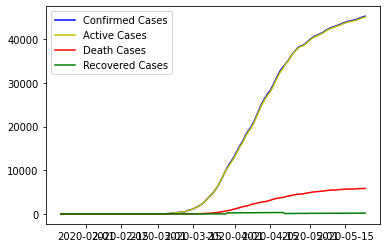

The country is: New Zealand


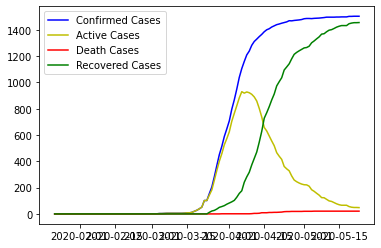

The country is: Nicaragua


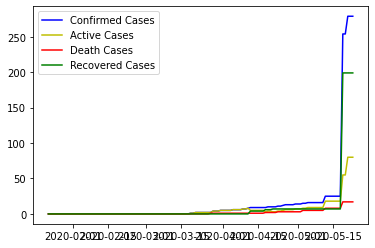

The country is: Niger


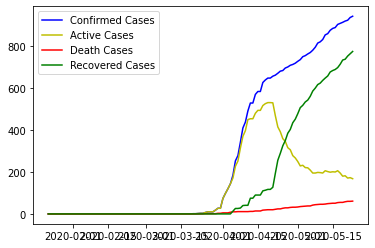

The country is: Nigeria


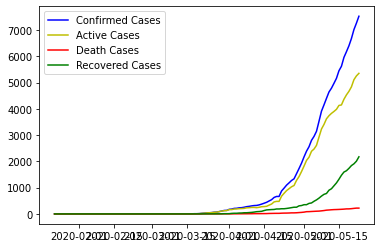

The country is: North Macedonia


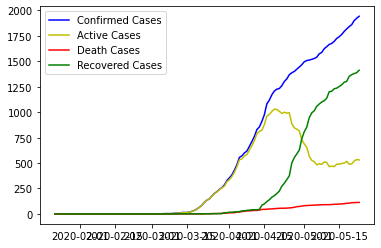

The country is: Norway


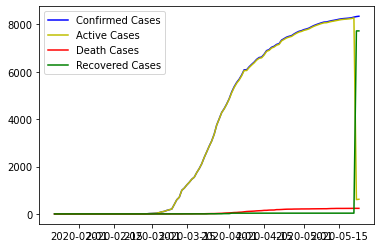

The country is: Oman


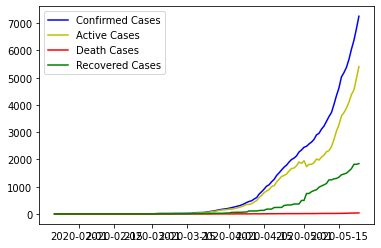

The country is: Pakistan


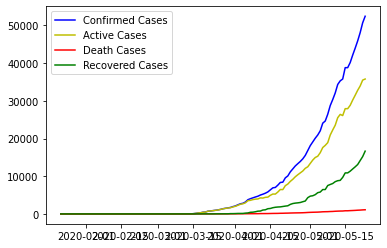

The country is: Panama


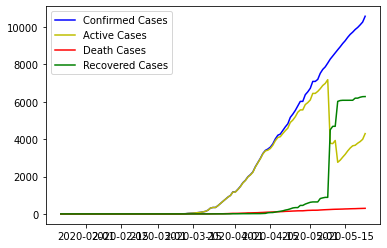

The country is: Papua New Guinea


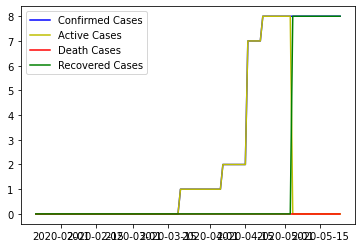

The country is: Paraguay


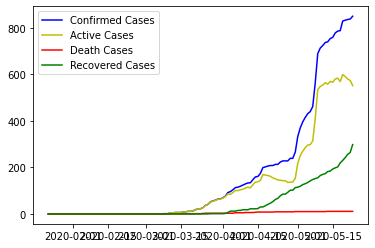

The country is: Peru


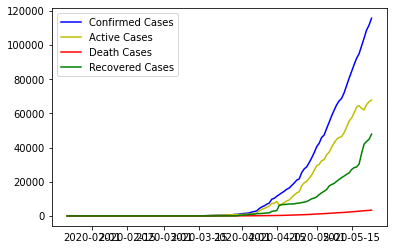

The country is: Philippines


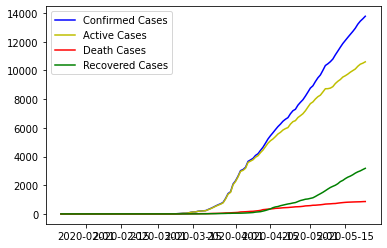

The country is: Poland


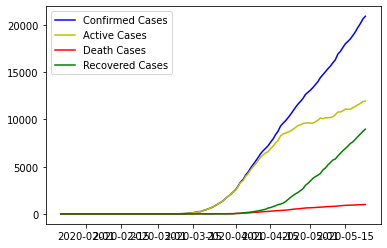

The country is: Portugal


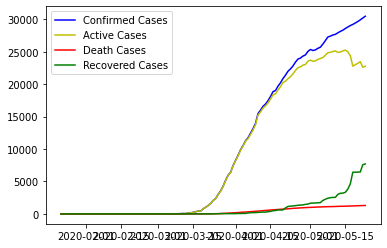

The country is: Qatar


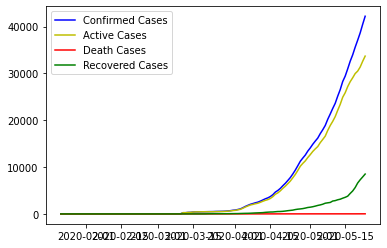

The country is: Republic of the Congo


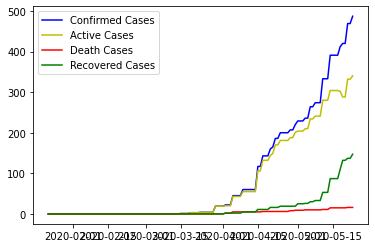

The country is: Romania


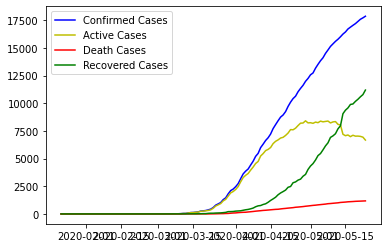

The country is: Russia


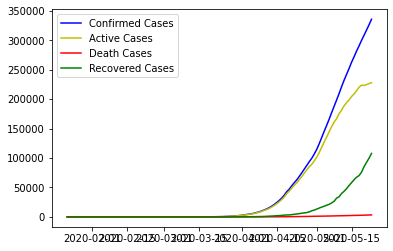

The country is: Rwanda


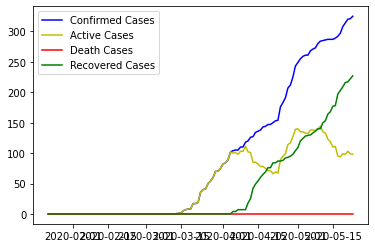

The country is: Saint Kitts and Nevis


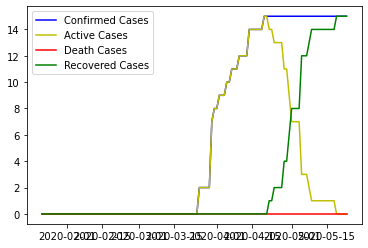

The country is: Saint Lucia


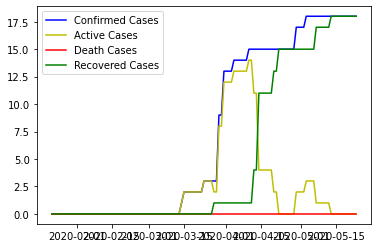

The country is: Saint Vincent and the Grenadines


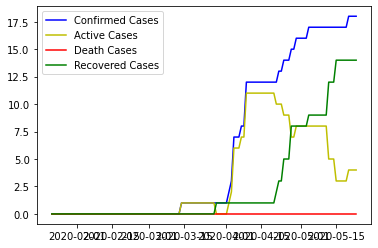

The country is: San Marino


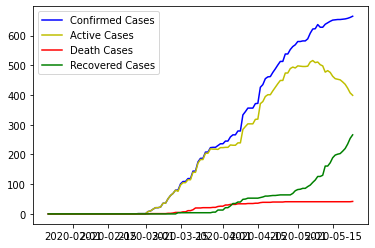

The country is: Sao Tome and Principe


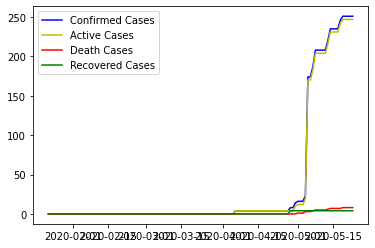

The country is: Saudi Arabia


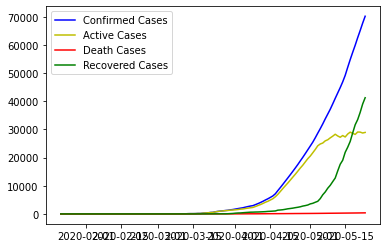

The country is: Senegal


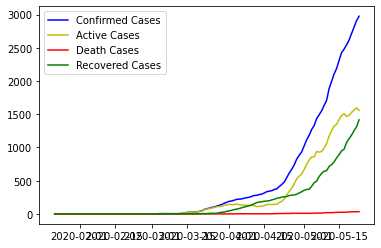

The country is: Serbia


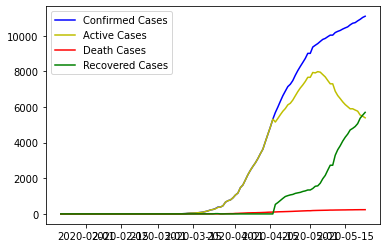

The country is: Seychelles


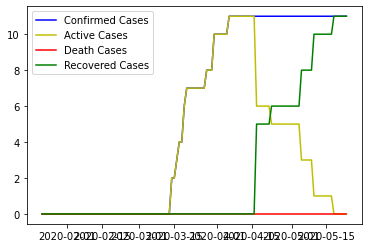

The country is: Sierra Leone


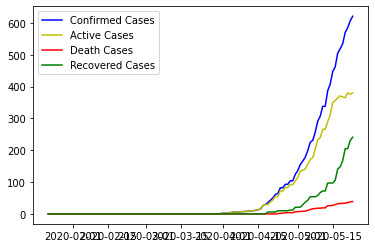

The country is: Singapore


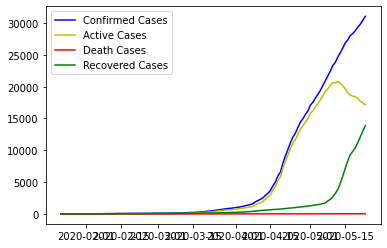

The country is: Slovakia


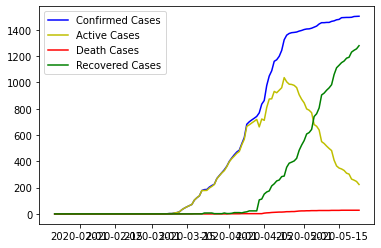

The country is: Slovenia


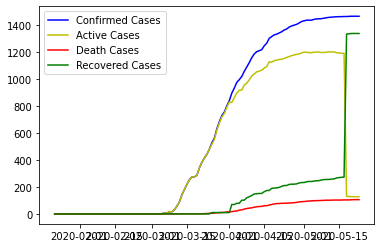

The country is: Somalia


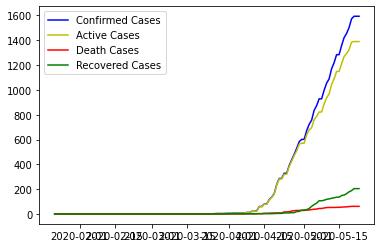

The country is: South Africa


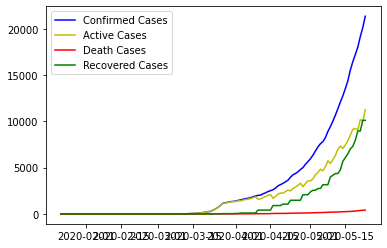

The country is: South Sudan


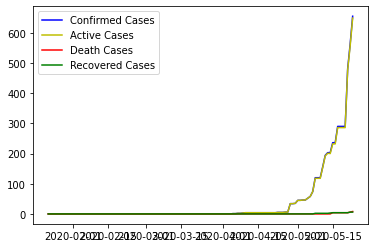

The country is: Spain


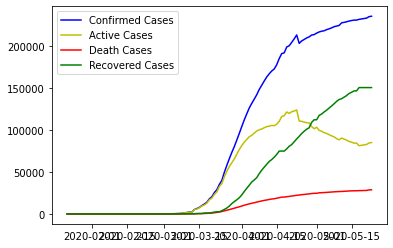

The country is: Sri Lanka


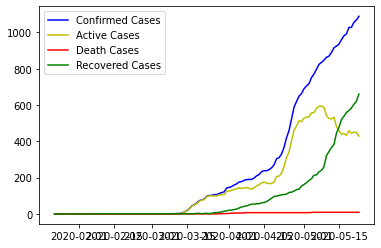

The country is: Sudan


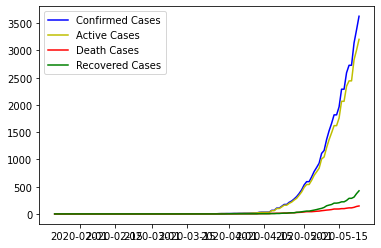

The country is: Suriname


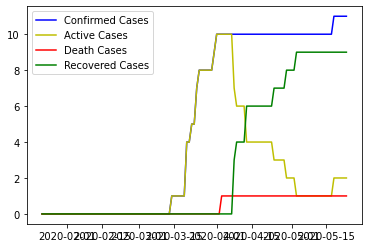

The country is: Sweden


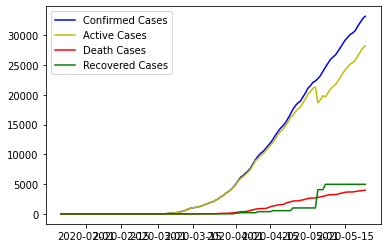

The country is: Switzerland


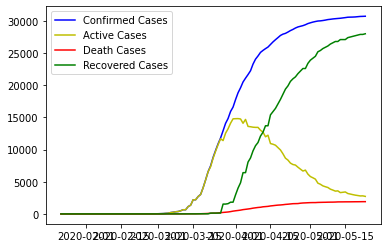

The country is: Syria


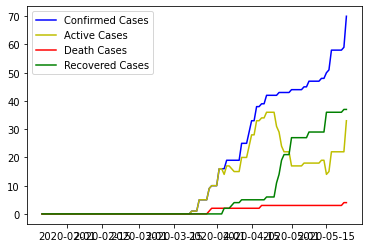

The country is: Taiwan


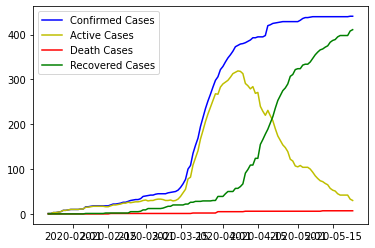

The country is: Tajikistan


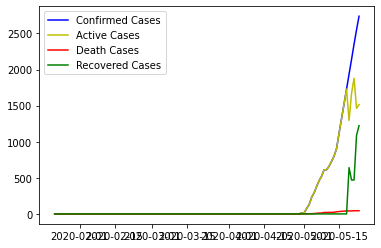

The country is: Tanzania


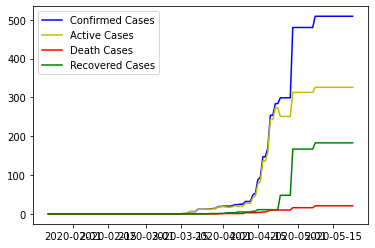

The country is: Thailand


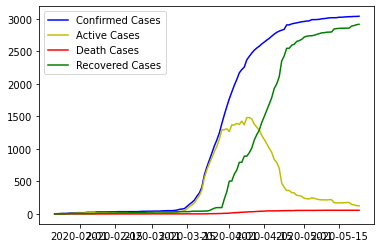

The country is: Timor-Leste


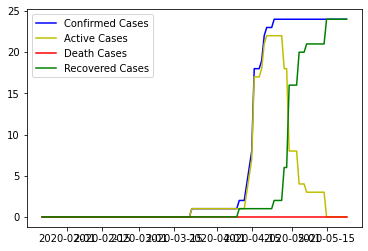

The country is: Togo


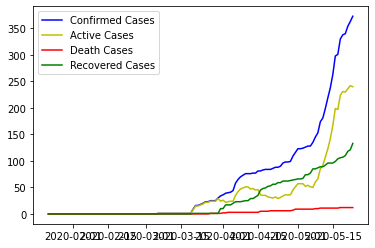

The country is: Trinidad and Tobago


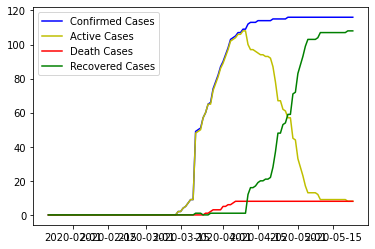

The country is: Tunisia


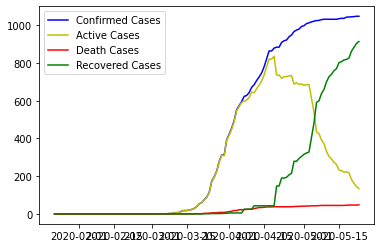

The country is: Turkey


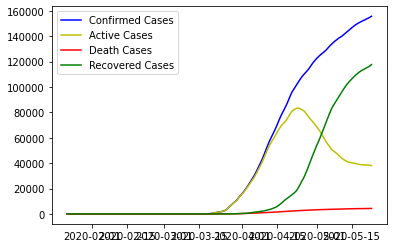

The country is: USA


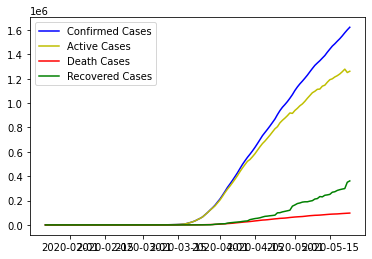

The country is: Uganda


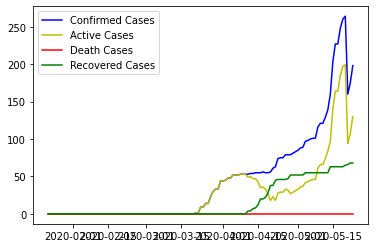

The country is: Ukraine


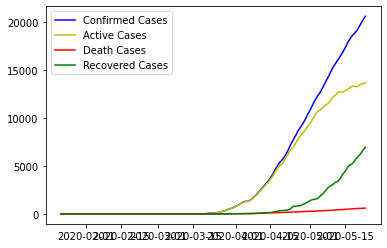

The country is: United Arab Emirates


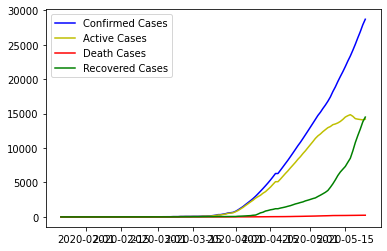

The country is: United Kingdom


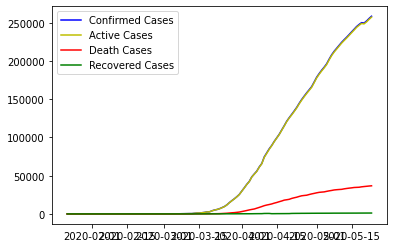

The country is: Uruguay


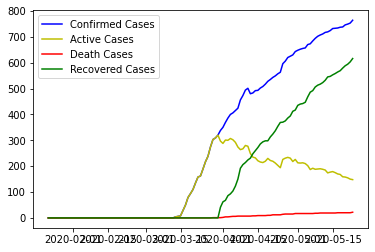

The country is: Uzbekistan


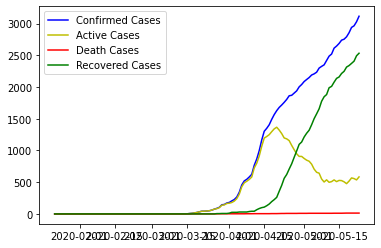

The country is: Venezuela


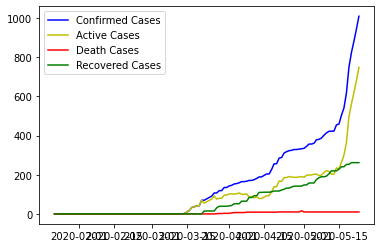

The country is: Vietnam


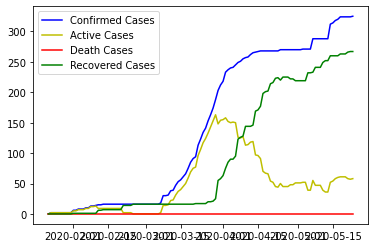

The country is: West Bank and Gaza


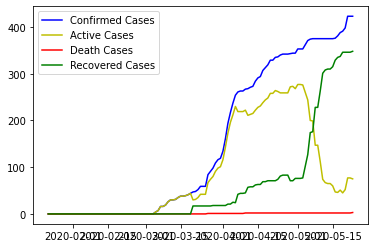

The country is: Western Sahara


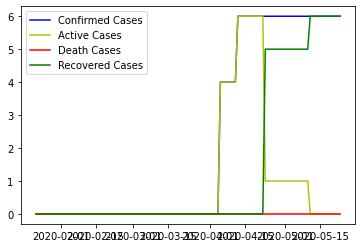

The country is: Yemen


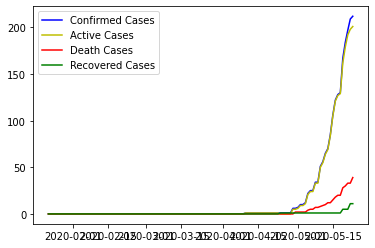

The country is: Zambia


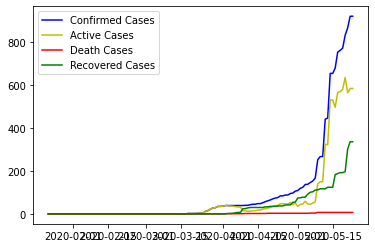

The country is: Zimbabwe


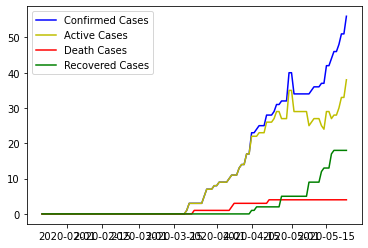

The country is: Global


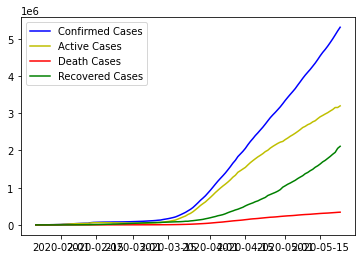

In [13]:
for i in df_confirmed:
  print("The country is:", i)
  plt.figure()
  plt.plot(df_confirmed.index, df_confirmed[i], color = "b", label = "Confirmed Cases");
  plt.plot(df_active.index, df_active[i], color = "y", label = "Active Cases");
  plt.plot(df_death.index, df_death[i], color = "r", label = "Death Cases");
  plt.plot(df_recovered.index, df_recovered[i], color = "g", label = "Recovered Cases");
  plt.legend(loc = "best")
  plt.show()

## Interactive Data Visualization <br>


### World Map

     |████████████████████████████████| 4.0MB 4.9MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
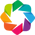

In [14]:
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
!pip install -q holoviews==1.12.7
import holoviews as hv
hv.extension('bokeh')

import warnings
warnings.filterwarnings('ignore')

In [15]:
#setting up the world map in bokeh and holoviews
from bokeh.tile_providers import get_provider, Vendors

#get the coordinates from https://carto.com/
tile_provider = get_provider("CARTODBPOSITRON")

# range bounds supplied in web mercator coordinates
p = figure(x_range=(-2000000, 6000000), y_range=(-1000000, 7000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

#Transform LON/LAT coordinates in web mercator format
#function to transform
def wgs84_to_web_mercator(df, lon="LON", lat="LAT"):

      k = 6378137
      df["x"] = df[lon] * (k * np.pi/180.0)
      df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k

      return df

#rename columns for the function
df_wgs84.rename(columns={"Long": "LON", "Lat": "LAT"}, inplace=True)

#use the function 
df_mercator_web= wgs84_to_web_mercator(df_wgs84)
df_mercator_web.head()

#Plot position markers in the map
p.circle(x=df_mercator_web["x"], y=df_mercator_web["y"], size=15, fill_color="blue")

show(p)

In [0]:
#make it interactive!
#first step show actual number and Country while hover over the bubble
my_hover = HoverTool()
my_hover.tooltips = [('Actual_number of deaths', '')]


### Interactive Plotting

In [19]:
from bokeh.models import HoverTool

# data
x_line = df_active.index
y_line = df_active.Germany

# line plot
line_plot = figure(plot_width=500, plot_height=325, title='Covid-19 Cases in Germany', x_axis_label='Date', y_axis_label='Active Cases')
line_plot.line(x_line, y_line, legend='Active Cases', line_width=2)

# add hover tool
line_plot.add_tools(HoverTool())

# another way to set axis labels
# line_plot.xaxis.axis_label = 'x-axis'
# line_plot.yaxis.axis_label = 'y-axis'

show(line_plot)


#### Using Bokeh and ipywidgets

In [158]:
# line plot - multiple lines

from bokeh.layouts import layout
import ipywidgets as widgets

# timestamp_start = df_confirmed.index.min()
# timestamp_end = df_confirmed.index.max()

#Dropdown widget
drop_down = widgets.Dropdown(options=df_confirmed.columns,
                                value="Germany",
                                description='Country:',
                                disabled=False)

#plotting function
def plot_country(country):
  # data
  multi_line_x = df_confirmed.index
  multi_line_confirmed = df_confirmed[country]
  multi_line_death = df_death[country]
  multi_line_recovered = df_recovered[country]

  # plot 
  multi_line_plot = figure(plot_width=500, plot_height=300, title='Covid-19 Cases in {}'.format(country), 
                          x_axis_label='Date', y_axis_label='# of Cases', x_axis_type='datetime', y_axis_type = "linear")
                          
  multi_line_plot.left[0].formatter.use_scientific = False

  multi_line_plot.line(x = "Date", y=country, color='yellow', line_width=3, source = df_confirmed, legend = "Confirmed Cases")
  multi_line_plot.line(multi_line_x, multi_line_death, color='red', line_width=3, legend = "Death Cases")
  multi_line_plot.line(multi_line_x, multi_line_recovered, color='green', line_width=3, legend = "Recovered Cases")


  # add hover tool
  multi_line_plot.add_tools(HoverTool())

  #format legend
  multi_line_plot.legend.location = "top_left"
  multi_line_plot.legend.orientation = "vertical"

  show(multi_line_plot)

widgets.interact(plot_country, country=drop_down);

#here, I use ipywidgets and try to link a dropdown to the bokeh plot using "interact". 
#However, in the output, just the dropdown is shown, not the plot itself

interactive(children=(Dropdown(description='Country:', index=65, options=('Afghanistan', 'Albania', 'Algeria',…

In [169]:
plot_country("USA")

#the written function works just fine

#### Using Bokeh with its own dropdown widget

In [136]:
#different approach: Here, I try to use bokeh's own dropdown widget instead of the ipywidgets dropdown widget

from bokeh.io import output_file, show
from bokeh.models import Dropdown
from bokeh.layouts import column, row

menu = list(df_confirmed.columns)
dropdown = Dropdown(label="Country Selection", button_type="warning", menu=menu, value="Germany")

#dropdown.js_link("value", multi_line_plot, "country")
#here I have to write a javascript link to link a change in the dropdown to a change in the graph, which I can't do

show(row(multi_line_plot, dropdown))

#### Next widgets/visualizations

In [166]:
#next step: select a certain start- and enddate for the plot

import ipywidgets as widgets

widgets.DatePicker(
    description='Pick a Startdate',
    disabled=False
)


DatePicker(value=None, description='Pick a Startdate')

In [0]:
#different idea was to use a stacked area plot instead of a line plot
x = df_confirmed.index
stacked_area_plot = figure(plot_width=600, plot_height=300, x_axis_type='datetime')

stacked_area_plot.varea_stack(x=x, 
                              stackers= [df_death.Germany, df_recovered.Germany, df_active.Germany],
                              color=('red', 'green', 'orange'))

show(stacked_area_plot)

In [0]:
# stacked_area_plot = figure(plot_width=600, plot_height=300)
# stacked_area_plot.varea(y1=stack(),       y2=stack('Germany'),         x='Date', color='red', source=df_death, name='Death Cases')
# stacked_area_plot.varea(y1=stack('2016'), y2=stack('2016', '2017'), x='Date', color='green',  source=df_recovered, name='Recovered Cases')

### using ipywidgets

In [146]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [0]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
%matplotlib inline
import matplotlib.dates as mdates

#dstart = df_confirmed.index[startdate]
#dend = df_confirmed.index[enddate]

def country_visualization(country, startdate, enddate):
  #plt.figure()
  fig, ax = plt.subplots()
  ax.plot_date(df_confirmed.index, df_confirmed[country], color = "b", label = "Confirmed Cases");
  #ax.set_xlim([pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00')])
  #plt.xlim(pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00'))
  #plt.xlim(xlim((left, right)))
  ax.set_xticks(df_confirmed.index)
  ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
  ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
  _=plt.xticks(rotation=90)
  #plt.xlim(df_confirmed.index[startdate], df_confirmed.index[enddate])
  #plt.xlim([df_confirmed.index[startdate], df_confirmed.index[enddate]])
  ax.plot_date(df_active.index, df_active[country], color = "y", label = "Active Cases");
  #ax.set_xlim([pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00')])
  ax.plot_date(df_death.index, df_death[country], color = "r", label = "Death Cases");
  #ax.set_xlim([pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00')])
  ax.plot_date(df_recovered.index, df_recovered[country], color = "g", label = "Recovered Cases");
  #ax.set_xlim([pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00')])
  #plt.xlim(pd.to_datetime('2020-01-28 23:50:00'), pd.to_datetime('2020-02-29 00:10:00'))
  ax.legend(loc = "best");
  plt.xlabel('Date')
  plt.ylabel('No. of Cases')
  plt.title('Types of Covid-19 cases per country')
  #plt.set_xlim([df_confirmed.index[startdate], df_confirmed.index[enddate]])
  plt.show();

interactive_plot = interact(country_visualization, country = df_confirmed.columns, startdate = df_confirmed.index, enddate = df_confirmed.index)
interactive_plot;

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

In [149]:
import datetime
dates = [datetime.date(2015, i, 1) for i in range(1, 13)]
options = [(i.strftime('%b'), i) for i in dates]
widgets.SelectionRangeSlider(
    options=options,
    index=(0, 11),
    description='Months (2015)',
    disabled=False
)

SelectionRangeSlider(description='Months (2015)', index=(0, 11), options=(('Jan', datetime.date(2015, 1, 1)), …